In [1]:
import gc
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from simple_linear_regr import (
    TYPE_FLOAT,
    TYPE_INT,
    add_bias,
    SimpleLinearRegression
)
from simple_linear_regr_utils import (
    generate_data, 
    evaluate
)
from benchmark import (
    benchmark
)

# Data

In [3]:
X_train, y_train, X_test, y_test = generate_data()

X_train = add_bias(X_train)
y_train = y_train.astype(TYPE_FLOAT)
y_test = y_test.astype(TYPE_FLOAT)

print(f"X_train.shape {X_train.shape} y_train.shape {y_train.shape}")

# Training Samples: 422; # Test samples: 20;
X_train.shape (422, 2) y_train.shape (422, 1)


# Gradient Descent Formula

To avoid two vectorized calculation for ```W``` and ```b```, integrate ```b``` into ```W```.

NOTE: Image link is broken in Github private repo. Please run as jupyter notebook or open the image from the image link.
<img src="./gradient_descent.jpg" align="left"/>

## Integrate intercept (bias) into slope coefficients

NOTE: Image link is broken in Github private repo.
<img src="./intersect_to_slope.jpg" align="left" width=500/>

## Deriving $ \frac {dL}{dW} = X^T @ \frac {dL}{d\overline{Y}} $

NOTE: Image link is broken in Github private repo.
<img src="./nn_back_propagation_dL_dWT.png" align="left"/>

# Training

In [4]:
model = SimpleLinearRegression()
model.fit(X_train,y_train)

Initial Loss: -153.89375637065567
Iteration 0, Loss: -138.5042769431284
Iteration 100, Loss: -0.002695942302910481
Iteration 200, Loss: 0.0009608323357563897
Iteration 300, Loss: 0.0009394104727822317
Iteration 400, Loss: 0.0009183728196928698
Iteration 500, Loss: 0.0008978062924263064
Iteration 600, Loss: 0.0008777003428610541
Iteration 700, Loss: 0.0008580446565300548
Iteration 800, Loss: 0.0008388291501293388
Iteration 900, Loss: 0.0008200439658847536
Iteration 1000, Loss: 0.0008016794670573368
Iteration 1100, Loss: 0.0007837262325014471
Iteration 1200, Loss: 0.0007661750521834598
Iteration 1300, Loss: 0.0007490169223567378
Iteration 1400, Loss: 0.0007322430406770941
Iteration 1500, Loss: 0.0007158448023201203
Iteration 1600, Loss: 0.000699813794694748
Iteration 1700, Loss: 0.0006841417939513761
Iteration 1800, Loss: 0.0006688207602958407
Iteration 1900, Loss: 0.0006538428340174818
Iteration 2000, Loss: 0.0006392003313400174
Iteration 2100, Loss: 0.0006248857406356834
Iteration 2200

# Evaluation

Slope: [[152.93371798 906.8943433 ]]
Mean squared error: 2585.87
Coefficient of determination: 0.46


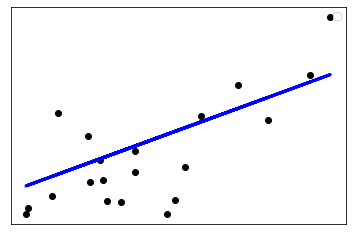

****** Success ******


True

In [5]:
predicted = model.predict(X_test)
evaluate(model, X_test, y_test, predicted)

# Save model

In [6]:
model.save("../../model/model.npy")

# Load model & Re-evaluate

Slope: [[152.93371798 906.8943433 ]]
Mean squared error: 2585.87
Coefficient of determination: 0.46


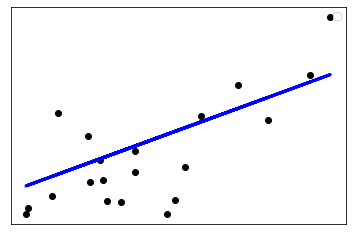

****** Success ******


True

In [7]:
del model
gc.collect()

model = SimpleLinearRegression()
model.load("../../model/model.npy")
evaluate(model, X_test, y_test, predicted)

---
# Bench Mark

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


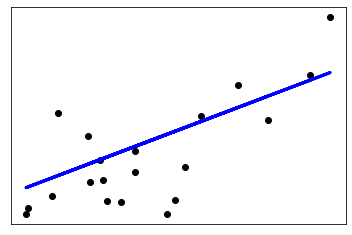

0.47257544798227147

In [8]:
benchmark()